In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import sys
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras import ops,layers,Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
keras.utils.set_random_seed(123)

In [2]:
def depth_img_to_npy(path):
    # Step 1: Load the .png file
    depth_image = Image.open(path)
    # print(depth_image.size)
    
    # Step 2: Convert to grayscale if not already
    if depth_image.mode != 'L':  # 'L' mode indicates a single channel (grayscale)
        print("Converting to grayscale...")
        depth_image = depth_image.convert('L')
    
    # Step 3: Convert to NumPy array
    depth_array = np.array(depth_image)
    # print(depth_array.shape)
    return depth_array

def load_and_preprocess_data(df_row, img_size=(256, 256)):
    root = 'nyu_data'
    img_path = os.path.join(root, df_row['image'])
    img_path = os.path.normpath(img_path).replace("\\", "/")
    depth_path = os.path.join(root, df_row['depth'])

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)
    img = tf.image.convert_image_dtype(img, tf.float32) # Use tf.image.convert_image_dtype

    depth_map = depth_img_to_npy(depth_path).squeeze()
    max_depth = min(300, np.percentile(depth_map, 99))
    depth_map = np.clip(depth_map, 0.1, max_depth)
    depth_map = np.log(depth_map)
    # print("Min/Max depth before preprocessing:", np.min(depth_map), np.max(depth_map))
    depth_map = np.clip(depth_map, 0.1, np.log(max_depth))# Clip after masking
    depth_map = cv2.resize(depth_map, img_size)
    depth_map = np.expand_dims(depth_map, axis=-1)
    depth_map = tf.image.convert_image_dtype(depth_map, tf.float32) 
    # print("Min/Max depth after preprocessing:", np.min(depth_map), np.max(depth_map))# Use tf.image.convert_image_dtype
    return img, depth_map

def visualize_data(image, depth_map):
    # Apply mask to depth map
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].imshow(image)
    axes[0].set_title('Image')
    
    # Use plt.cm.jet colormap
    axes[1].imshow(depth_map, cmap=plt.cm.jet)  
    axes[1].set_title('Depth Map')
    
    plt.show()

In [3]:
'''
csv_file_path = 'nyu_data/data/nyu2_train.csv'  # Replace with the actual path to your CSV file

df = pd.read_csv(csv_file_path)
df.columns = ['image', 'depth']
df = df.sample(frac=1, random_state=42)
# df = df[:32]
print("DataFrame Loaded")
print(df.count())

for i in range(1):
    img, depth_map = load_and_preprocess_data(df.iloc[i]) 
    visualize_data(img, depth_map)

csv_file_path = 'nyu_data/data/nyu2_test.csv'  # Replace with the actual path to your CSV file

df = pd.read_csv(csv_file_path)
df.columns = ['image', 'depth']
df = df.sample(frac=1, random_state=42)
# df = df[:32]
print("DataFrame Loaded")
print(df.count())

for i in range(1):
    img, depth_map = load_and_preprocess_data(df.iloc[i]) 
    visualize_data(img, depth_map)
'''

'\ncsv_file_path = \'nyu_data/data/nyu2_train.csv\'  # Replace with the actual path to your CSV file\n\ndf = pd.read_csv(csv_file_path)\ndf.columns = [\'image\', \'depth\']\ndf = df.sample(frac=1, random_state=42)\n# df = df[:32]\nprint("DataFrame Loaded")\nprint(df.count())\n\nfor i in range(1):\n    img, depth_map = load_and_preprocess_data(df.iloc[i]) \n    visualize_data(img, depth_map)\n\ncsv_file_path = \'nyu_data/data/nyu2_test.csv\'  # Replace with the actual path to your CSV file\n\ndf = pd.read_csv(csv_file_path)\ndf.columns = [\'image\', \'depth\']\ndf = df.sample(frac=1, random_state=42)\n# df = df[:32]\nprint("DataFrame Loaded")\nprint(df.count())\n\nfor i in range(1):\n    img, depth_map = load_and_preprocess_data(df.iloc[i]) \n    visualize_data(img, depth_map)\n'

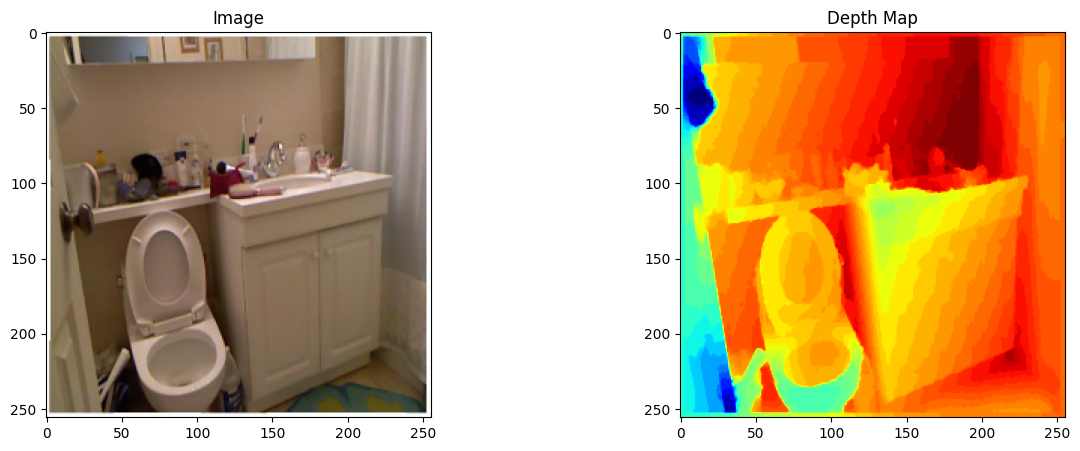

Image path: D:/minie/code/nyu_data/data/nyu2_train/bathroom_0002_out/34.jpg
Depth path: D:/minie/code/nyu_data/data/nyu2_train/bathroom_0002_out/34.png
Processed image shape: (256, 256, 3)
Processed depth map shape: (256, 256, 1)


In [4]:
def process_and_visualize_from_paths(image_path, depth_path):
    # Create a dummy DataFrame row
    df_row = {'image': image_path, 'depth': depth_path}
    
    # Load and preprocess the data using the existing function
    img, depth_map = load_and_preprocess_data(df_row)
    
    # Visualize the data using the existing function
    visualize_data(img, depth_map)
    
    # Print additional information
    print(f"Image path: {image_path}")
    print(f"Depth path: {depth_path}")
    print(f"Processed image shape: {img.shape}")
    print(f"Processed depth map shape: {depth_map.shape}")

# Example usage:
image_path = "D:/minie/code/nyu_data/data/nyu2_train/bathroom_0002_out/34.jpg"
depth_path = "D:/minie/code/nyu_data/data/nyu2_train/bathroom_0002_out/34.png"

process_and_visualize_from_paths(image_path, depth_path)
